In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cardio_train.csv',delimiter=';')
df.head(10)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0   988  22469       1     155    69.0    130     80            2     2   
1   989  14648       1     163    71.0    110     70            1     1   
2   990  21901       1     165    70.0    120     80            1     1   
3   991  14549       2     165    85.0    120     80            1     1   
4   992  23393       1     155    62.0    120     80            1     1   
5   995  21143       1     164    61.0    100     70            1     1   
6   996  18085       1     162    72.0    100     70            1     1   
7   997  22547       1     161    93.0    140     90            2     1   
8   999  21250       1     157    68.0    110     80            1     1   
9  1000  22446       1     158    65.0    140     90            3     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       1       0  
3      1     1       1       0  
4      0     0       1       0  
5      0     0       1       0  
6      0     0       1       0  
7      0     0       1       1  
8      0     0       1       0  
9      0     0       1       1

In [3]:
#Lets check the shape of the Dataset
df.shape

(69301, 13)

In [4]:
#Lets find out the null values if any
df.sum().isnull()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [5]:
#Lets drop the "id" column which dont shows the importance while creating a model
df.drop(['id'],axis=1,inplace=True)

In [6]:
df.head(10)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  22469       1     155    69.0    130     80            2     2      0   
1  14648       1     163    71.0    110     70            1     1      0   
2  21901       1     165    70.0    120     80            1     1      0   
3  14549       2     165    85.0    120     80            1     1      1   
4  23393       1     155    62.0    120     80            1     1      0   
5  21143       1     164    61.0    100     70            1     1      0   
6  18085       1     162    72.0    100     70            1     1      0   
7  22547       1     161    93.0    140     90            2     1      0   
8  21250       1     157    68.0    110     80            1     1      0   
9  22446       1     158    65.0    140     90            3     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       1       0  
3     1       1       0  
4     0       1       0  
5     0       1       0  
6     0       1       0  
7     0       1       1  
8     0       1       0  
9     0       1       1

In [7]:
#As the age column is defined by the number of days ,lets convert into years 
df['age'] = df['age']/365

In [8]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  61.558904       1     155    69.0    130     80            2     2      0   
1  40.131507       1     163    71.0    110     70            1     1      0   
2  60.002740       1     165    70.0    120     80            1     1      0   
3  39.860274       2     165    85.0    120     80            1     1      1   
4  64.090411       1     155    62.0    120     80            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       1       0  
3     1       1       0  
4     0       1       0

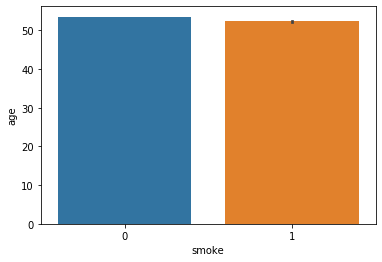

In [9]:
#Lets do some visualisation to understand more
#Lets check how many smoker and non smoker are present
sns.barplot(x='smoke',y='age',data=df)
plt.show()

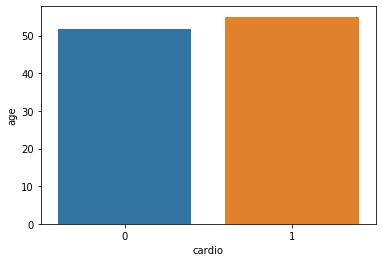

In [10]:
#Lets check the range of the people having the cardio column with respect to age
sns.barplot(x='cardio',y='age',data=df)
plt.show()

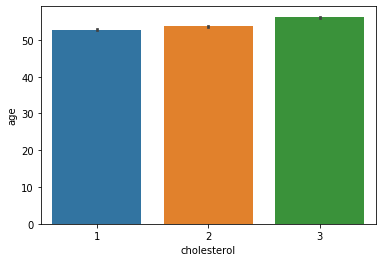

In [11]:
#here in cholestrol category 1 - normal , 2 - above normal , 3 - well above normal 
#Lets expore it with respect to age
sns.barplot(x='cholesterol',y='age',data=df)
plt.show()

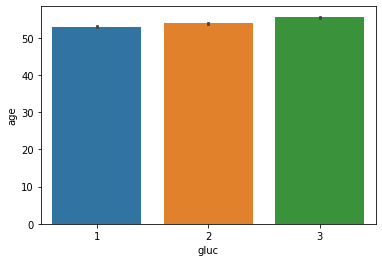

In [12]:
#Lets check the glucose level with respect to age
sns.barplot(x='gluc',y='age',data=df)
plt.show()

In [13]:
#lets separate x and y
x = df.drop(columns=["cardio"],axis=1)
y = df[["cardio"]]

In [14]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [15]:
print(x_train.shape,x_test.shape)

(48510, 11) (20791, 11)


In [16]:
print(y_train.shape,y_test.shape)

(48510, 1) (20791, 1)


In [17]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(69301, 12)
(55140, 12)


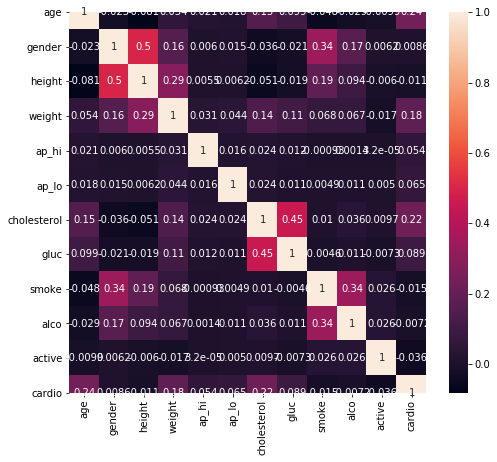

In [18]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

In [19]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [20]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [22]:
from sklearn.model_selection import cross_val_score

In [ ]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.6936174306190178


cross_val_score =  0.6940304635168293


roc_auc_curve 0.6938250613968141


classification_report               precision    recall  f1-score   support

           0       0.66      0.79      0.72     10372
           1       0.74      0.60      0.66     10419

    accuracy                           0.69     20791
   macro avg       0.70      0.69      0.69     20791
weighted avg       0.70      0.69      0.69     20791



[[8149 2223]
 [4147 6272]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated'